In [1]:
# libraries
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set up S3 and SageMaker environment
region_name = 'us-east-1'
bucket_name = 'nexttrendco'

s3 = boto3.client('s3', region_name=region_name)

In [3]:
# load data from S3
def load_s3_csv(file_key):
    """Loads a CSV file from S3 into a Pandas DataFrame."""
    obj = s3.get_object(Bucket=bucket_name, Key=file_key)
    return pd.read_csv(obj['Body'])

In [4]:
# load Favorita datasets
holidays_events_df = load_s3_csv('favorita/holidays_events.csv')
items_df = load_s3_csv('favorita/items.csv')
oil_df = load_s3_csv('favorita/oil.csv')
stores_df = load_s3_csv('favorita/stores.csv')
transactions_df = load_s3_csv('favorita/transactions.csv')

In [5]:
# Display
print("Holidays Events Dataset:")
print(holidays_events_df.head())

print("\nItems Dataset:")
print(items_df.head())

Holidays Events Dataset:
         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  

Items Dataset:
   item_nbr        family  class  perishable
0     96995     GROCERY I   1093           0
1     99197     GROCERY I   1067           0
2    103501      CLEANING   3008           0
3    103520     GROCERY I   1028           0
4    103665  BREAD/BAKERY   2712           1


In [6]:
# load Rossman datasets
rossman_store_df = load_s3_csv('rossman/store.csv')

print("\nRossman Store Data:")
print(rossman_store_df.head())


Rossman Store Data:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,

In [7]:
# load Walmart datasets
walmart_features_df = load_s3_csv('walmart/features.csv')
walmart_stores_df = load_s3_csv('walmart/stores.csv')

print("\nWalmart Features:")
print(walmart_features_df.head())


Walmart Features:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


In [8]:
def handle_missing_data(df, dataset_name):
    """Handles missing data for a given DataFrame."""
    print(f"\nHandling missing data for {dataset_name}:")
    print("Missing values before handling:")
    print(df.isnull().sum())

    # Handle numerical columns fill with median
    for col in df.select_dtypes(include='number').columns:
        df[col] = df[col].fillna(df[col].median())

    # Handle categorical columns fill with mode
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Display missing values after handling
    print("\nMissing values after handling:")
    print(df.isnull().sum())

    return df

In [9]:
# handle missing data for Favorita datasets
holidays_events_df = handle_missing_data(holidays_events_df, "Holidays Events")
items_df = handle_missing_data(items_df, "Items")
oil_df = handle_missing_data(oil_df, "Oil")
stores_df = handle_missing_data(stores_df, "Stores")
transactions_df = handle_missing_data(transactions_df, "Transactions")


Handling missing data for Holidays Events:
Missing values before handling:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Missing values after handling:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Handling missing data for Items:
Missing values before handling:
item_nbr      0
family        0
class         0
perishable    0
dtype: int64

Missing values after handling:
item_nbr      0
family        0
class         0
perishable    0
dtype: int64

Handling missing data for Oil:
Missing values before handling:
date           0
dcoilwtico    43
dtype: int64

Missing values after handling:
date          0
dcoilwtico    0
dtype: int64

Handling missing data for Stores:
Missing values before handling:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Missing values after handling:
store_nbr    0
city         0
state

In [10]:
# handle missing data for Rossman dataset
rossman_store_df = handle_missing_data(rossman_store_df, "Rossman Store")


Handling missing data for Rossman Store:
Missing values before handling:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Missing values after handling:
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [11]:
# handle missing data for Walmart datasets
walmart_features_df = handle_missing_data(walmart_features_df, "Walmart Features")
walmart_stores_df = handle_missing_data(walmart_stores_df, "Walmart Stores")



Handling missing data for Walmart Features:
Missing values before handling:
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Missing values after handling:
Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

Handling missing data for Walmart Stores:
Missing values before handling:
Store    0
Type     0
Size     0
dtype: int64

Missing values after handling:
Store    0
Type     0
Size     0
dtype: int64


In [12]:
# check duplicates in transactions data
print("\nChecking for duplicate records in Transactions:")
duplicates = transactions_df.duplicated().sum()
print(f"Duplicate Records: {duplicates}")

# Drop duplicates
transactions_df = transactions_df.drop_duplicates()



Checking for duplicate records in Transactions:
Duplicate Records: 0


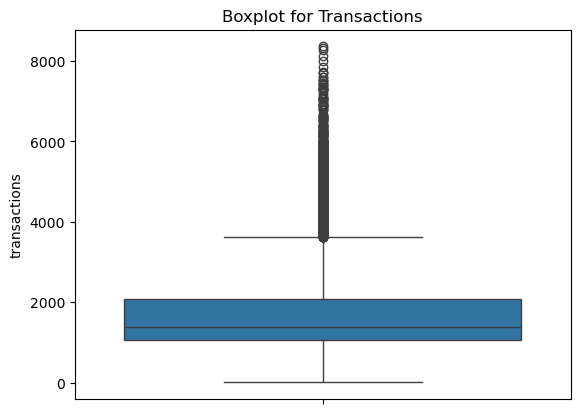

In [13]:
# boxplot for the transactions column
sns.boxplot(data=transactions_df['transactions'])
plt.title('Boxplot for Transactions')
plt.show()


In [14]:
# IQR method to identify outliers
Q1 = transactions_df['transactions'].quantile(0.25)
Q3 = transactions_df['transactions'].quantile(0.75)
IQR = Q3 - Q1

outliers = transactions_df[(transactions_df['transactions'] < (Q1 - 1.5 * IQR)) |
                           (transactions_df['transactions'] > (Q3 + 1.5 * IQR))]

print(f"Number of Outliers: {len(outliers)}")

Number of Outliers: 4583


In [15]:
# Remove outliers from the dataset
transactions_cleaned = transactions_df[(transactions_df['transactions'] >= (Q1 - 1.5 * IQR)) &
                                       (transactions_df['transactions'] <= (Q3 + 1.5 * IQR))]
print(f"Shape after removing outliers: {transactions_cleaned.shape}")

Shape after removing outliers: (78905, 3)


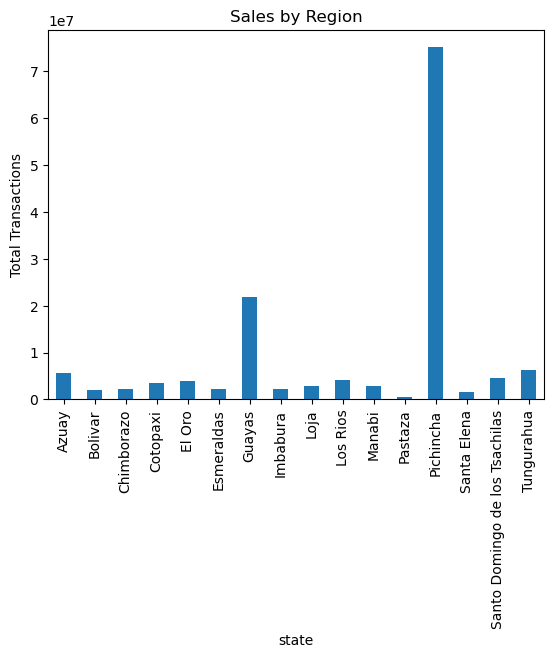

In [19]:
# Merge transactions and store info
merged_df = pd.merge(transactions_df, stores_df, on='store_nbr')

# Group by state and sum transactions
region_sales = merged_df.groupby('state')['transactions'].sum()

# Plot
region_sales.plot(kind='bar', title='Sales by Region')
plt.ylabel('Total Transactions')
plt.show()

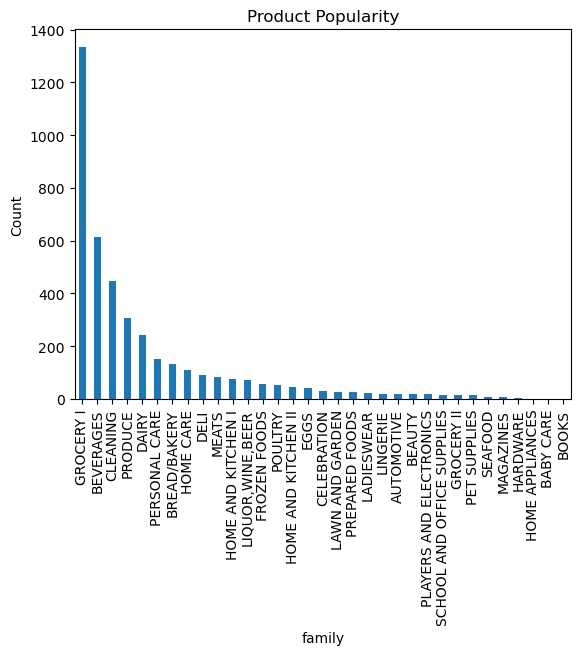

In [20]:
# transactions by product family
product_popularity = items_df['family'].value_counts()
product_popularity.plot(kind='bar', title='Product Popularity')
plt.ylabel('Count')
plt.show()

['GROCERY I' 'CLEANING' 'BREAD/BAKERY' 'DELI' 'POULTRY' 'EGGS'
 'PERSONAL CARE' 'LINGERIE' 'BEVERAGES' 'AUTOMOTIVE' 'DAIRY' 'GROCERY II'
 'MEATS' 'FROZEN FOODS' 'HOME APPLIANCES' 'SEAFOOD' 'PREPARED FOODS'
 'LIQUOR,WINE,BEER' 'BEAUTY' 'HARDWARE' 'LAWN AND GARDEN' 'PRODUCE'
 'HOME AND KITCHEN II' 'HOME AND KITCHEN I' 'MAGAZINES' 'HOME CARE'
 'PET SUPPLIES' 'BABY CARE' 'SCHOOL AND OFFICE SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'CELEBRATION' 'LADIESWEAR' 'BOOKS']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54]


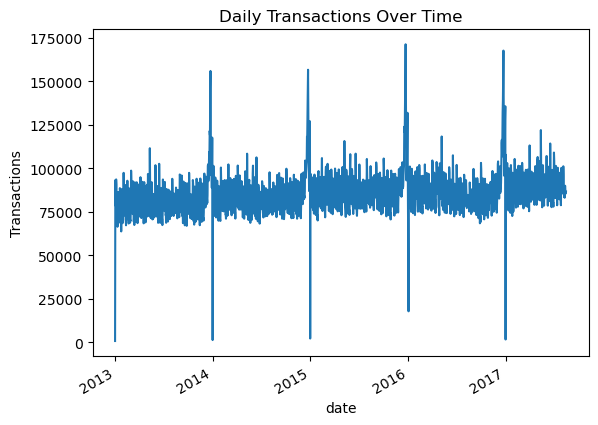

In [21]:
# product categories
print(items_df['family'].unique())

# store IDs
print(stores_df['store_nbr'].unique())

# time-series analysis
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
daily_transactions = transactions_df.groupby('date')['transactions'].sum()
daily_transactions.plot(kind='line', title='Daily Transactions Over Time')
plt.ylabel('Transactions')
plt.show()


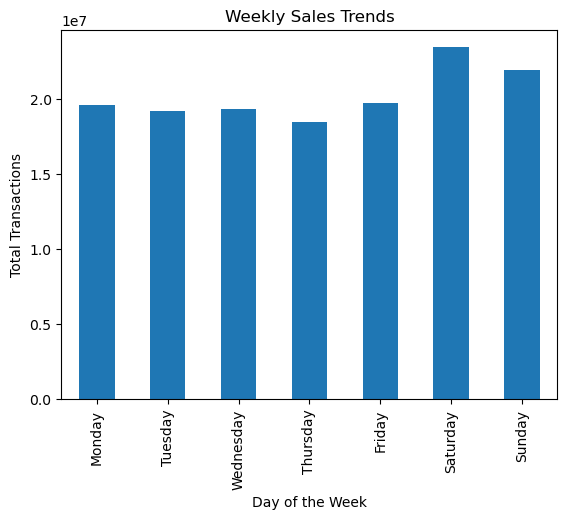

In [22]:
# day of the week from the date
transactions_df['day_of_week'] = transactions_df['date'].dt.day_name()

# group by day of the week and sum transactions
weekly_trends = transactions_df.groupby('day_of_week')['transactions'].sum()

# reorder days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_trends = weekly_trends.reindex(ordered_days)

# weekly transaction trends
weekly_trends.plot(kind='bar', title='Weekly Sales Trends')
plt.ylabel('Total Transactions')
plt.xlabel('Day of the Week')
plt.show()
